<a href="https://colab.research.google.com/github/Haque14/MSE504/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 4 for the Introduction to Machine Learning in Materials Science
 - Instructor Sergei V. Kalinin

Action items:
- Please add your name and department
- To submit the homework, share the Colab with my Gmail address

# Part I. ROC and AUC

Let's create a half-moon data set.

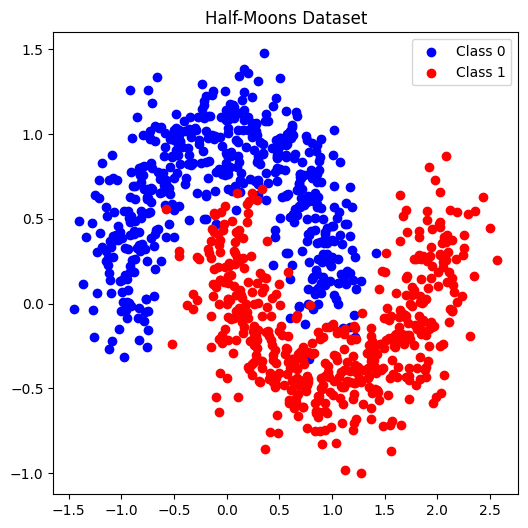

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate the half-moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Visualize the dataset
plt.figure(figsize=(6,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.title('Half-Moons Dataset')
plt.legend()
plt.show()

Problem 1: Choose a classifier and classify the points. Obviously, start with train/test split. You can experiment with different classifiers (e.g., decision tree, k-NN, support vector machine) and observe how the decision boundary and ROC curve change.


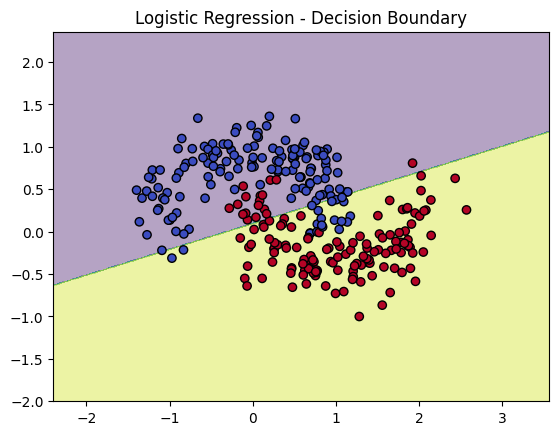

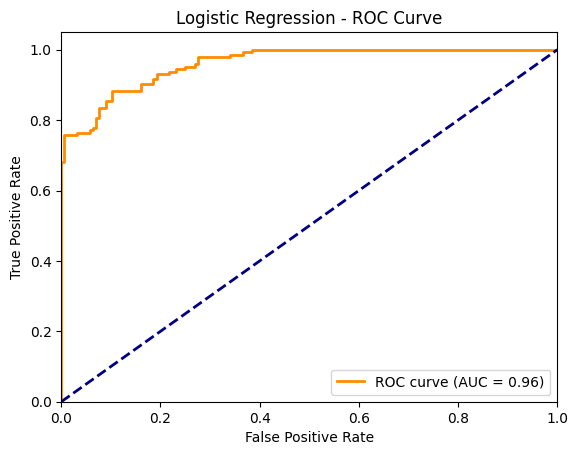

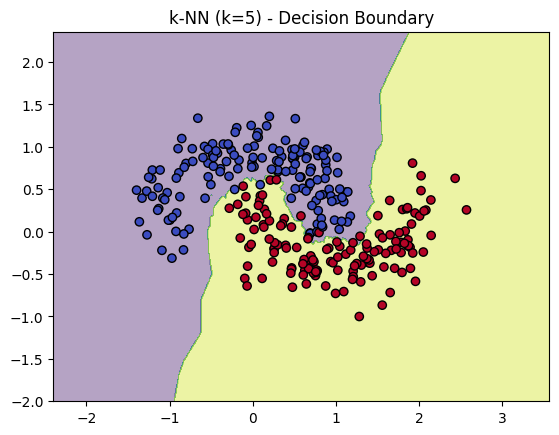

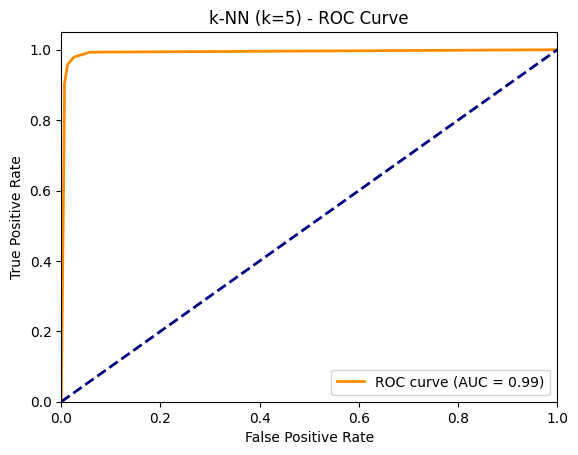

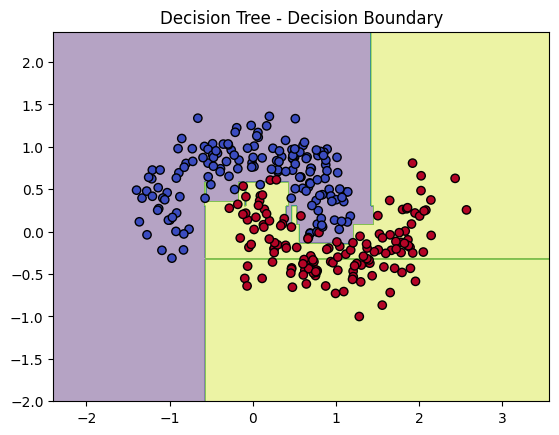

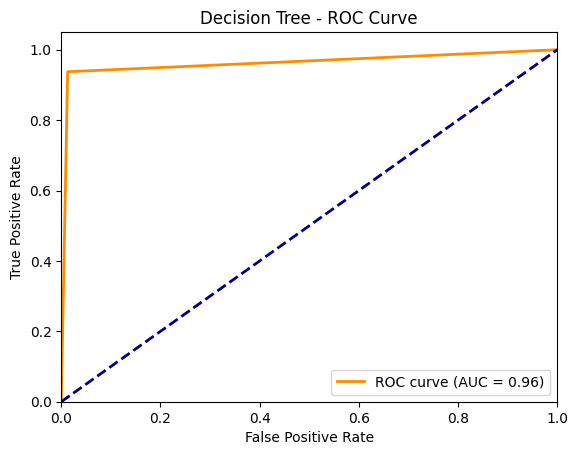

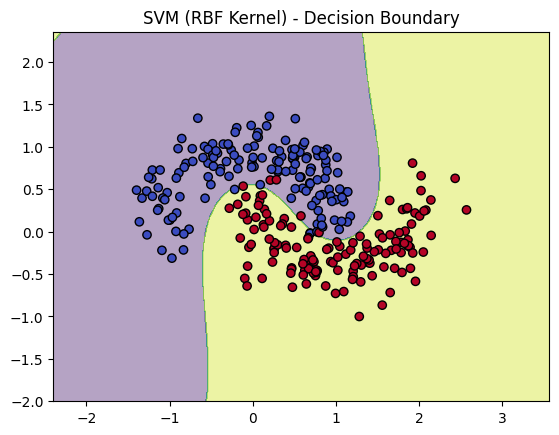

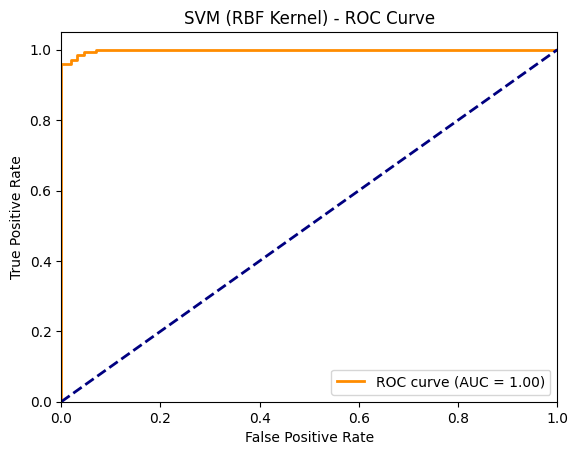

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Generate the half-moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Step 1: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

# Function to plot ROC Curve
def plot_roc_curve(clf, X_test, y_test, title):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Step 2: Classifiers to Experiment
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'k-NN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM (RBF Kernel)': SVC(probability=True)
}

# Step 3: Train, Visualize, and Plot for Each Classifier
for name, clf in classifiers.items():
    # Train classifier
    clf.fit(X_train, y_train)

    # Plot decision boundary
    plot_decision_boundary(clf, X_test, y_test, f'{name} - Decision Boundary')

    # Plot ROC curve
    plot_roc_curve(clf, X_test, y_test, f'{name} - ROC Curve')

Problem 2: Explain why you chose it and how you think it will perform on this dataset.

Answer 2:

**How I Think Each Classifier Will Perform:**


**1. Logistic Regression:**

**Why I Chose It:**

Logistic Regression is a simple and interpretable model often used as a baseline. It assumes that classes can be separated by a linear decision boundary.

**Expected Performance:**


*   **Limitations:** The half-moons dataset is not linearly separable, so Logistic Regression will struggle to fit the curved boundary between the two classes.

*   **Decision Boundary:** It will likely produce a straight or slightly curved line that cuts across the dataset but won’t match the shape of the moons well.
*   **ROC Curve:** The model will give a decent ROC curve, but the AUC will likely be lower than other non-linear models.

**2. k-Nearest Neighbors (k-NN):**

**Why I Chose It:**

k-NN is a non-parametric model that makes predictions based on local data points (neighbors). It does not assume a global decision boundary, making it ideal for non-linear datasets.

**Expected Performance:**


*   **Strengths:** Since k-NN makes decisions based on nearby points, it can adapt to the curved structure of the half-moons dataset.
*   **Decision Boundary:** The boundary will be highly flexible and follow the shape of the moons. However, it might overfit in noisy regions, especially with smaller values of k.
*   **ROC Curve:** k-NN should give a better ROC curve than Logistic Regression, with higher AUC because it will capture more of the non-linear structure.

**3. Decision Tree:**

**Why I Chose It:**

Decision Trees are flexible models that divide the feature space into regions based on the purity of the data. They can fit both linear and non-linear decision boundaries.

**Expected Performance:**


*   **Strengths:** Decision Trees can fit complex, non-linear boundaries, which is helpful for datasets like this one. They can handle noise and complex data distributions well.
*   **Weaknesses:** Decision Trees may overfit in noisy datasets like this one unless we prune the tree or set a limit on the depth.
*   **Decision Boundary:** The boundary will be more box-like, as the tree makes axis-aligned splits. It will likely be more jagged than other methods.
*   **ROC Curve:** The AUC may vary depending on the depth of the tree. A deep tree will likely perform well on the training set but could overfit on the test set.


**4. Support Vector Machine (SVM) with RBF Kernel:**

**Why I Chose It:**

SVM with an RBF (Radial Basis Function) kernel is designed to handle non-linear decision boundaries. It transforms the data into a higher-dimensional space where the classes become linearly separable.

**Expected Performance:**


*   **Strengths:** The RBF kernel is well-suited to datasets like the half-moons because it can learn complex, non-linear decision boundaries.
*   **Weaknesses:** It may take longer to train compared to simpler models, and it is sensitive to hyperparameters (like the regularization parameter C and kernel width gamma).
*   **Decision Boundary:** The decision boundary will be smooth and curved, matching the shape of the moons quite well.
*   **ROC Curve:** SVM is expected to produce a high AUC because of its ability to learn the non-linear structure of the dataset.


**General Predictions:**

*   Logistic Regression will likely perform the worst because it cannot handle the non-linear decision boundary well.
*   k-NN and SVM (with the RBF kernel) are expected to perform the best due to their ability to adapt to the non-linearity of the data.
*   Decision Tree will perform well but may overfit depending on how deep the tree is allowed to grow.

Problem 3: Plot the decision boundary of your chosen classifier. How well does the decision boundary separate the two classes?

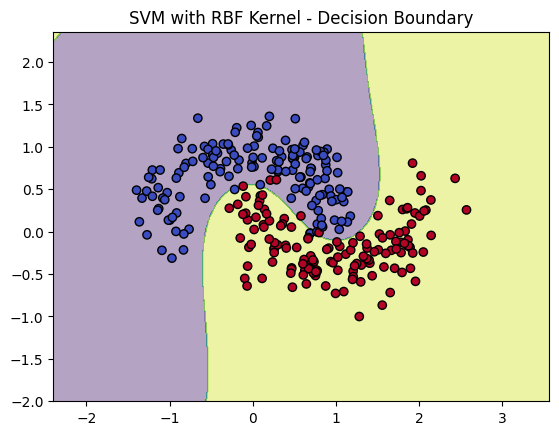

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate the half-moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Step 1: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train SVM Classifier with RBF Kernel
clf = SVC(kernel='rbf', probability=True)  # Using RBF kernel
clf.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

# Step 3: Plot Decision Boundary
plot_decision_boundary(clf, X_test, y_test, 'SVM with RBF Kernel - Decision Boundary')

**How Well Does It Separate the Two Classes**

*   **SVM with RBF Kernel** is expected to produce a smooth, non-linear decision boundary that closely follows the shapes of the two half-moons.
*   The decision boundary should effectively separate the two classes, with most points correctly classified on either side of the boundary, though some misclassifications may occur near the overlapping/noisy regions.

Problem 4: Plot the ROC curve for your classifier and compute the AUC. Compare the AUC with other classifiers if you tried different ones.

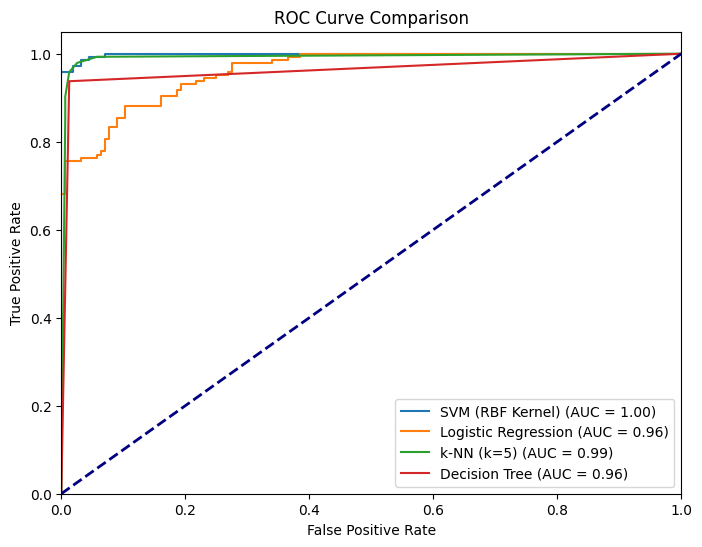

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate the half-moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of classifiers to compare
classifiers = {
    'SVM (RBF Kernel)': SVC(probability=True, kernel='rbf'),
    'Logistic Regression': LogisticRegression(),
    'k-NN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier()
}

# Function to plot ROC curve for each classifier
def plot_roc_curves(classifiers, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(8, 6))

    for name, clf in classifiers.items():
        # Train classifier
        clf.fit(X_train, y_train)

        # Get probabilities for ROC curve
        y_pred_proba = clf.predict_proba(X_test)[:, 1]

        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

        # Compute AUC
        auc = roc_auc_score(y_test, y_pred_proba)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

    # Plot random chance line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Plot settings
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc="lower right")
    plt.show()

# Plot the ROC curves for all classifiers
plot_roc_curves(classifiers, X_train, X_test, y_train, y_test)

Problem 5: Explain the relationship between the decision boundary and the ROC curve.
- What happens when the classifier is more flexible (e.g., a decision tree with more depth)?
- What are the trade-offs between sensitivity and specificity as seen in the ROC curve?

Answer 5:

**Relationship Between the Decision Boundary and the ROC Curve:**

*   **Decision Boundary:** The decision boundary is a line (or curve) that separates classes in the feature space. It shows how a classifier divides the input space between different class labels based on the learned model. For example, a linear decision boundary is a straight line for simple classifiers like Logistic Regression, while more flexible models, such as Decision Trees or SVM with a non-linear kernel, can have complex boundaries.

*   **ROC Curve:** The ROC curve (Receiver Operating Characteristic) plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) across different decision thresholds. It evaluates how well a classifier can distinguish between classes for various thresholds, providing insight into the trade-off between sensitivity and specificity.

**Relationship:**

*   A good decision boundary leads to a high AUC (Area Under the Curve) in the ROC curve because it correctly separates the classes, leading to both high sensitivity (True Positive Rate) and low false positives (False Positive Rate).
*   A poor decision boundary results in a low AUC and a flat ROC curve because the classifier struggles to distinguish between classes, increasing both false positives and false negatives.

**Effect of Classifier Flexibility (e.g., Decision Tree with More Depth):**

When a classifier becomes more flexible (e.g., a Decision Tree with more depth), it can result in overfitting the training data, leading to a complex decision boundary and potentially high accuracy on the training set but poor generalization to unseen data.

**What Happens:**

*   **Shallow trees** (limited depth) have simple boundaries that can underfit, resulting in poor performance.
*   **Deep trees** can overfit the data, capturing noise, and small variations, leading to a very complex boundary. While this might result in good performance on the training set, it can lead to poor generalization and worse performance on the test set.


**Trade-offs Between Sensitivity and Specificity:**

*   **Sensitivity (True Positive Rate):** Measures the proportion of positives correctly classified.
*   **Specificity (True Negative Rate):** Measures the proportion of negatives correctly classified. It’s related to the False Positive Rate in the ROC curve (Specificity = 1 - FPR).

**Trade-offs Seen in the ROC Curve:**

*  By adjusting the decision threshold, you can either increase sensitivity or specificity. For example:

    *   Lowering the threshold increases sensitivity but also increases false positives, reducing specificity.
    *   Increasing the threshold improves specificity but reduces sensitivity (increases false negatives).

*  The ROC curve shows the trade-offs between sensitivity and specificity across all thresholds. A perfect classifier has a steep ROC curve (AUC = 1), whereas a random classifier has a diagonal line (AUC = 0.5).

**Example:**

*   **A deep decision tree** (flexible model) might have very high sensitivity on the training set (correctly classifying most positives) but low specificity due to overfitting. On the test set, this can result in poor AUC performance.

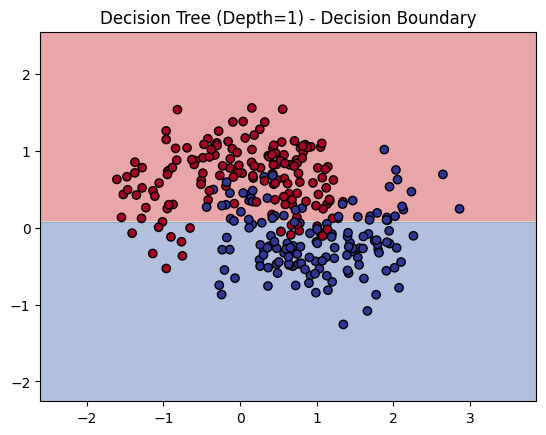

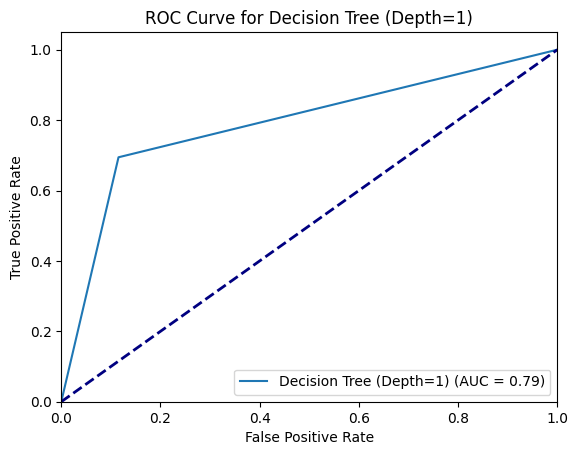

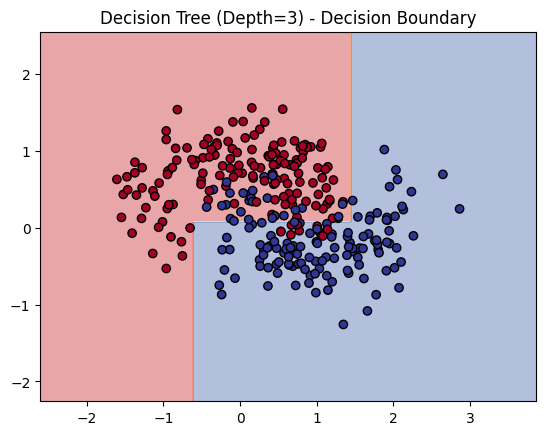

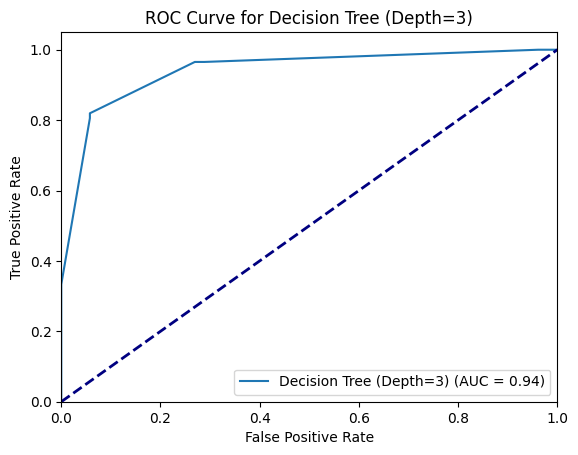

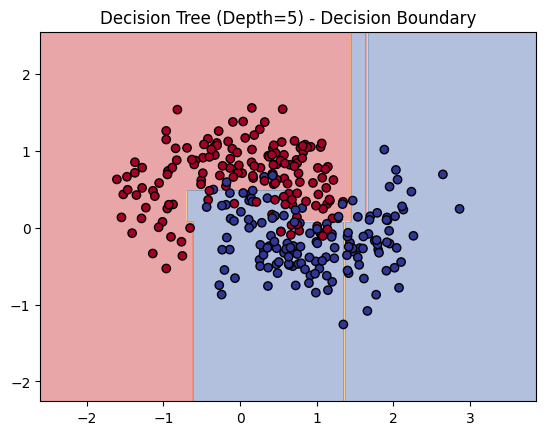

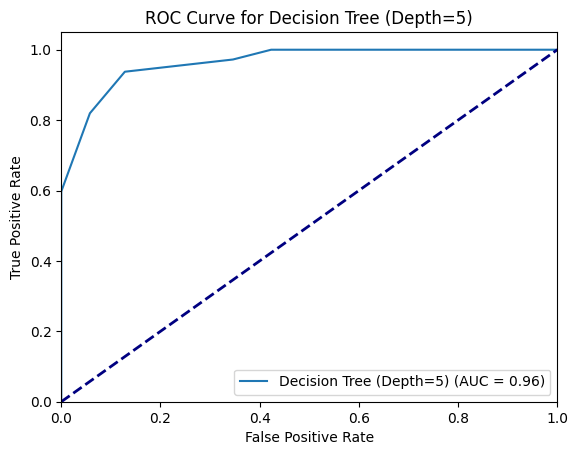

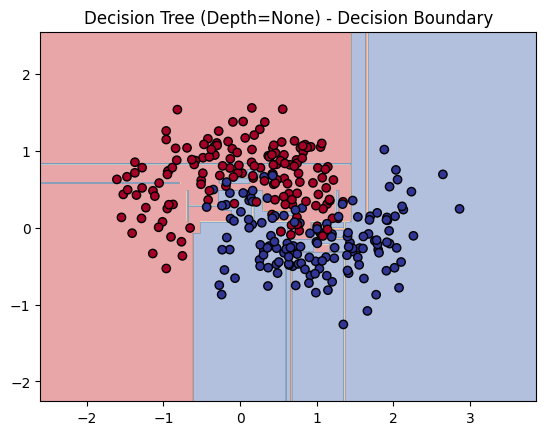

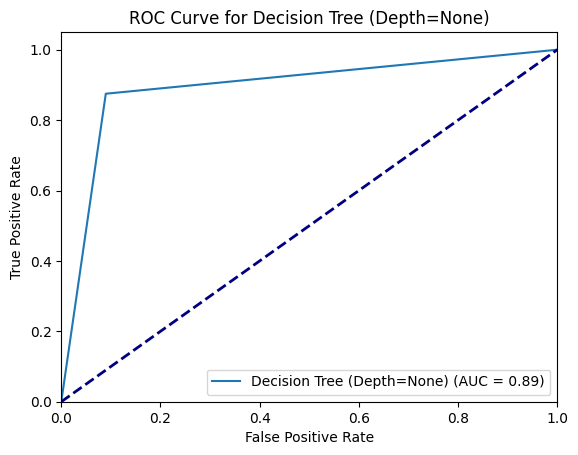

In [13]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Generate the half-moons dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(clf, X_test, y_test, title):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{title} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {title}')
    plt.legend(loc="lower right")
    plt.show()

# Experiment with Decision Tree of different depths
depths = [1, 3, 5, None]  # None means the tree can grow without constraint (full depth)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Plot decision boundary
    plot_decision_boundary(clf, X_test, y_test, f'Decision Tree (Depth={depth}) - Decision Boundary')

    # Plot ROC curve
    plot_roc_curve(clf, X_test, y_test, f'Decision Tree (Depth={depth})')

# Part II: Class probabilities

Problem 6:
- Import the Iris data set
- Select two features
- Build logistic regression classifier
- Visualize the class probabilities
- Plot the decision surface for thresholds 0.1 and 0.9



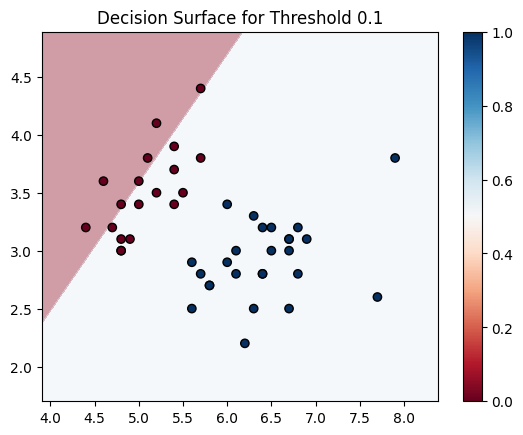

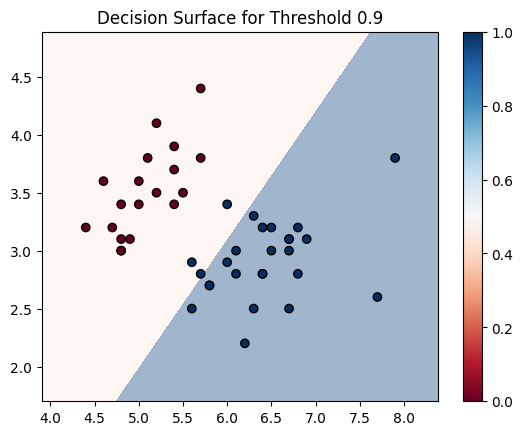

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. Import the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, [0, 1]]  # Selecting the first two features (sepal length, sepal width)
y = (iris.target != 0).astype(int)  # Binary classification: Classify if it's not class 0

# 2. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build Logistic Regression Classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# 4. Function to visualize the class probabilities
def plot_probabilities(clf, X, y, threshold=0.5, title='Decision Surface with Threshold'):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Plot the decision surface with the chosen threshold
    plt.contourf(xx, yy, Z, levels=[0, threshold, 1], alpha=0.4, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdBu)
    plt.title(f'{title} {threshold}')
    plt.colorbar()
    plt.show()

# 5. Visualize the class probabilities and decision surface for thresholds 0.1 and 0.9
plot_probabilities(clf, X_test, y_test, threshold=0.1, title='Decision Surface for Threshold')
plot_probabilities(clf, X_test, y_test, threshold=0.9, title='Decision Surface for Threshold')

Problem 7: Explain how these decision surfaces relate to ROC

Answer 7:

**Relationship Between Decision Surfaces and the ROC Curve:**

The decision surface and the ROC curve are both ways of visualizing a classifier's performance, but they represent different aspects of the classification process:

**1. Decision Surface:**

*  The decision surface visually shows how a classifier separates classes in the feature space. It indicates how the model predicts class membership based on the input features and where the boundary between classes lies.
*  By adjusting the decision threshold (e.g., 0.1, 0.9), we can alter the decision boundary, shifting it closer to one class or the other. A low threshold makes the model more likely to predict the positive class, while a high threshold makes it more conservative (more likely to predict the negative class).

**2. ROC Curve:**
*  The ROC curve (Receiver Operating Characteristic) plots the True Positive Rate (Sensitivity) against the False Positive Rate for various thresholds. It illustrates the classifier's performance across a range of thresholds.
*  The AUC (Area Under the Curve) provides a single measure of how well the classifier distinguishes between classes. A higher AUC means better separability between the classes.

**Relationship:**

*  Threshold and ROC Curve: The ROC curve is essentially the result of varying the decision threshold and measuring how the sensitivity (True Positive Rate) and specificity (1 - False Positive Rate) change.

  *  At low thresholds (e.g., 0.1), the classifier predicts the positive class more often, increasing the True Positive Rate (Sensitivity) but also increasing the False Positive Rate (misclassifying negatives as positives).
  *  At high thresholds (e.g., 0.9), the classifier becomes more conservative, reducing the False Positive Rate but also decreasing the True Positive Rate, as fewer true positives are predicted.

*  Decision Surface and Threshold:

  *  The decision surface changes shape when you adjust the threshold. A low threshold moves the decision boundary further from the positive class, capturing more of the negative class as positive (i.e., increasing False Positives). A high threshold shrinks the decision boundary around the positive class, leading to more False Negatives.

*  ROC Curve and Decision Surface: The ROC curve is a summary of the classifier's performance across different decision surfaces. Each point on the ROC curve corresponds to a specific decision surface, reflecting a particular threshold. For example:

   *  A point on the ROC curve with a high True Positive Rate and high False Positive Rate corresponds to a decision surface with a low threshold, where many negative samples are classified as positive (resulting in more False Positives).
   *  A point with low False Positive Rate but also low True Positive Rate corresponds to a decision surface with a high threshold, where the classifier is very conservative and misses many true positives.

**Visualizing the Decision Surface and ROC Curve Together:**

*  **Low Threshold (e.g., 0.1):**
The decision boundary will be more permissive, resulting in higher True Positive Rates (good sensitivity) but also higher False Positive Rates (lower specificity). This corresponds to a point on the upper right of the ROC curve.

*  **High Threshold (e.g., 0.9):**
The decision boundary becomes stricter, requiring higher confidence to classify a point as positive. This leads to lower False Positives (good specificity), but the True Positive Rate drops, corresponding to a point on the lower left of the ROC curve.

# Part III. Overfitting and Underfitting

Let's create a data set along with train/test data

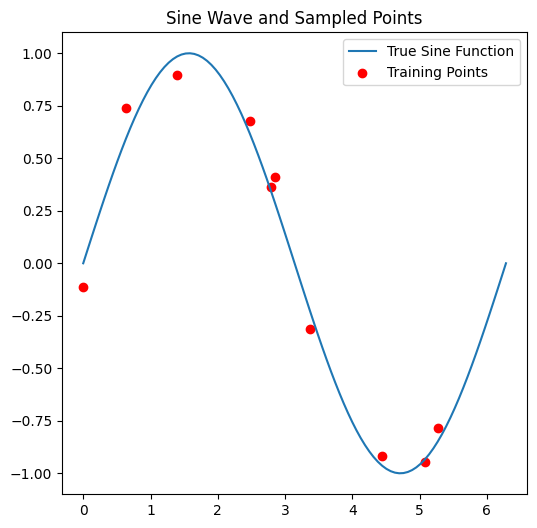

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 10 points for the dataset
indices = np.random.choice(len(X_full), 10, replace=False)
X_train = X_full[indices]
y_train = y_full[indices] + np.random.normal(0, 0.1, len(indices))

# Sort the selected points for better visualization
X_train, y_train = zip(*sorted(zip(X_train, y_train)))

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

# Plot the full sine wave and training points
plt.figure(figsize=(6, 6))
plt.plot(X_full, y_full, label='True Sine Function')
plt.scatter(X_train, y_train, color='red', label='Training Points')
plt.title('Sine Wave and Sampled Points')
plt.legend()
plt.show()

Problem 8: Fit the data with the polynomials with  degrees = np.arange(1, 15) and calculate train and test error as a function of polynomial degree. Hint - use the log scale to visualize the data

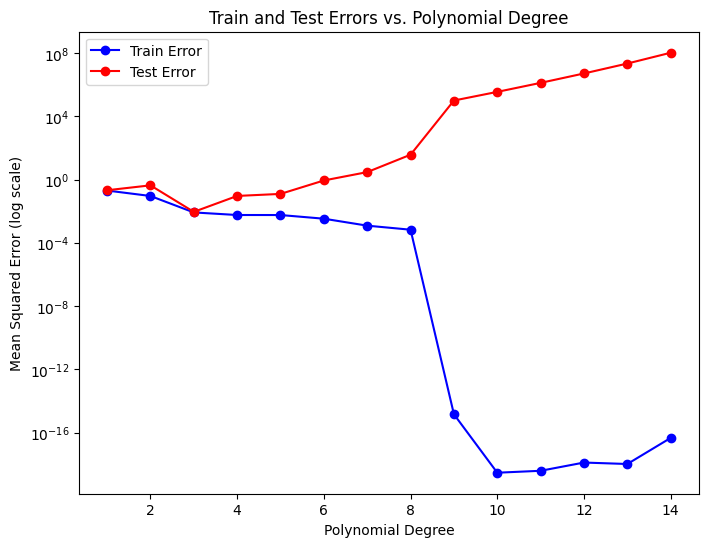

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 10 points for the dataset
indices = np.random.choice(len(X_full), 10, replace=False)
X_train = X_full[indices]
y_train = y_full[indices] + np.random.normal(0, 0.1, len(indices))

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

# Reshape X_train and X_test for compatibility with sklearn
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Arrays to store training and test errors
train_errors = []
test_errors = []

# Fit polynomial models for degrees 1 through 14
degrees = np.arange(1, 15)
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Fit the linear regression model on the transformed features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate mean squared error (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store the errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot the training and test errors
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o', color='blue')
plt.plot(degrees, test_errors, label='Test Error', marker='o', color='red')
plt.yscale('log')  # Use log scale for better visualization
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (log scale)')
plt.title('Train and Test Errors vs. Polynomial Degree')
plt.legend()
plt.show()

Problem 9: Plot the sine wave, training points, and fitted polynomials of different degrees

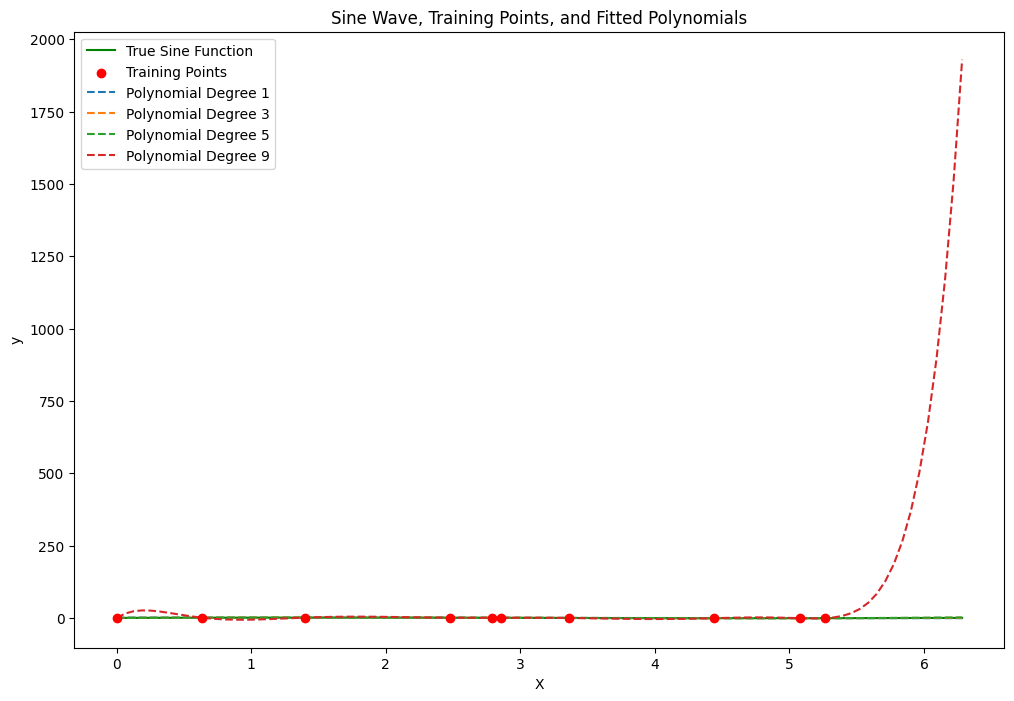

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 10 points for the dataset
indices = np.random.choice(len(X_full), 10, replace=False)
X_train = X_full[indices]
y_train = y_full[indices] + np.random.normal(0, 0.1, len(indices))  # Adding some noise

# Reshape the X arrays for sklearn
X_train = X_train[:, np.newaxis]
X_full = X_full[:, np.newaxis]  # Reshape the full dataset for prediction

# Define the polynomial degrees to visualize
degrees = [1, 3, 5, 9]  # You can add more degrees if you want

# Plot the sine wave, training points, and fitted polynomials
plt.figure(figsize=(12, 8))

# Plot the original sine wave
plt.plot(X_full, np.sin(X_full), label='True Sine Function', color='green')

# Scatter the training points
plt.scatter(X_train, y_train, color='red', label='Training Points', zorder=5)

# Fit and plot polynomials of different degrees
for degree in degrees:
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_full_poly = poly.transform(X_full)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict using the polynomial model
    y_full_pred = model.predict(X_full_poly)

    # Plot the fitted polynomial
    plt.plot(X_full, y_full_pred, label=f'Polynomial Degree {degree}', linestyle='--')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Sine Wave, Training Points, and Fitted Polynomials')
plt.legend()
plt.show()

Problem 10: Take the polynomial of degree 8, and explore how the learnign curve (train and test error as a function of number of samples) look like.

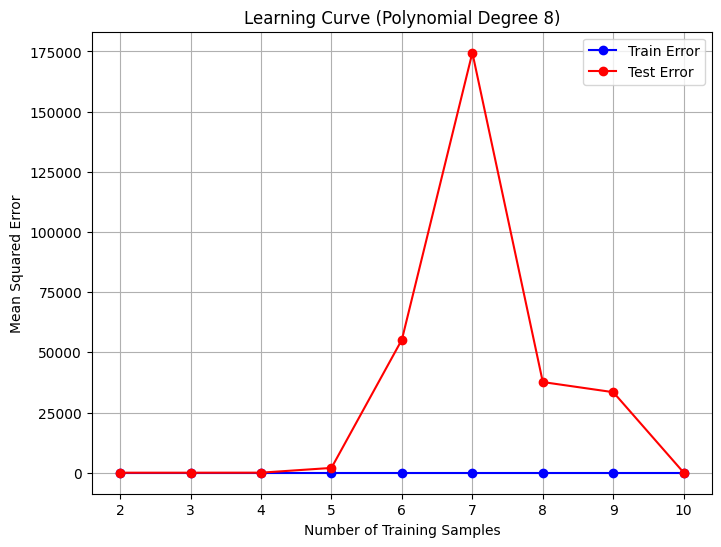

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 10 points for the dataset
indices = np.random.choice(len(X_full), 10, replace=False)
X_train = X_full[indices]
y_train = y_full[indices] + np.random.normal(0, 0.1, len(indices))

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

# Reshape X_train and X_test for compatibility with sklearn
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Degree of the polynomial we are exploring
degree = 8

# Arrays to store training and test errors for different sample sizes
train_errors = []
test_errors = []
sample_sizes = np.arange(2, len(X_train) + 1)

# Loop through different sample sizes
for sample_size in sample_sizes:
    # Use a subset of the training data
    X_train_subset = X_train[:sample_size]
    y_train_subset = y_train[:sample_size]

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train_subset)
    X_test_poly = poly_features.transform(X_test)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train_subset)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate mean squared error (MSE) for train and test sets
    train_mse = mean_squared_error(y_train_subset, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store the errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, train_errors, label='Train Error', marker='o', color='blue')
plt.plot(sample_sizes, test_errors, label='Test Error', marker='o', color='red')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve (Polynomial Degree 8)')
plt.legend()
plt.grid(True)
plt.show()

# Part IV. Regularized regression

Take this data set

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 5 points for the dataset
np.random.seed(42)
indices = np.random.choice(len(X_full), 5, replace=False)
X_train = X_full[indices]
y_train = y_full[indices]

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

Problem 11: Realize and visualize results of the Ridge regression for polynomial fit of degree 8.

Train MSE: 0.0000
Test MSE: 1.6614


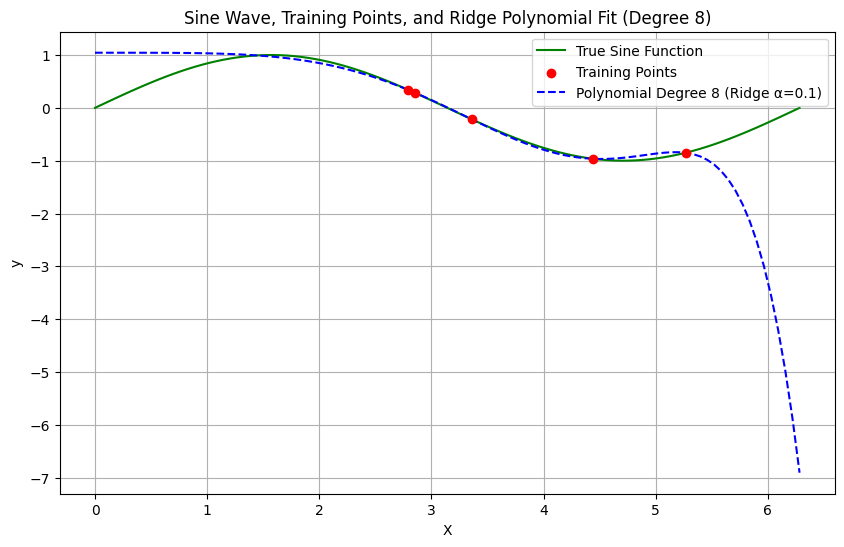

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 5 points for the dataset
np.random.seed(42)
indices = np.random.choice(len(X_full), 5, replace=False)
X_train = X_full[indices]
y_train = y_full[indices]

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

# Reshape X arrays for sklearn
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
X_full = X_full[:, np.newaxis]

# Polynomial degree and Ridge regularization
degree = 8
alpha = 0.1  # Regularization strength

# Polynomial feature transformation
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_full_poly = poly.transform(X_full)

# Ridge regression model
model = Ridge(alpha=alpha)
model.fit(X_train_poly, y_train)

# Predictions for train, test, and full data
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)
y_full_pred = model.predict(X_full_poly)

# Calculate mean squared errors
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print the training and test errors
print(f'Train MSE: {train_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')

# Plot the sine wave, training points, and the polynomial fit
plt.figure(figsize=(10, 6))

# Plot the original sine wave
plt.plot(X_full, np.sin(X_full), label='True Sine Function', color='green')

# Scatter the training points
plt.scatter(X_train, y_train, color='red', label='Training Points', zorder=5)

# Plot the polynomial fit from Ridge regression
plt.plot(X_full, y_full_pred, label=f'Polynomial Degree {degree} (Ridge α={alpha})', linestyle='--', color='blue')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Sine Wave, Training Points, and Ridge Polynomial Fit (Degree {degree})')
plt.legend()
plt.grid(True)
plt.show()

Problem 12:
- Experiment with different regularization strength. How large should be alpha to force the function to be linear?
- What is the optimal value of alpha for fit?

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


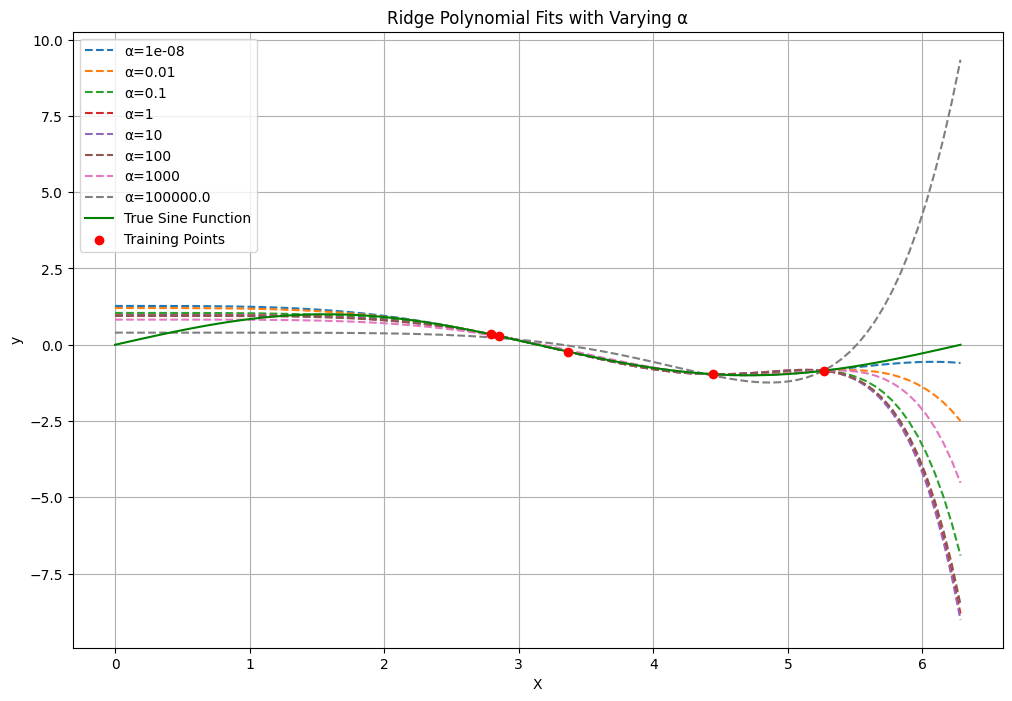

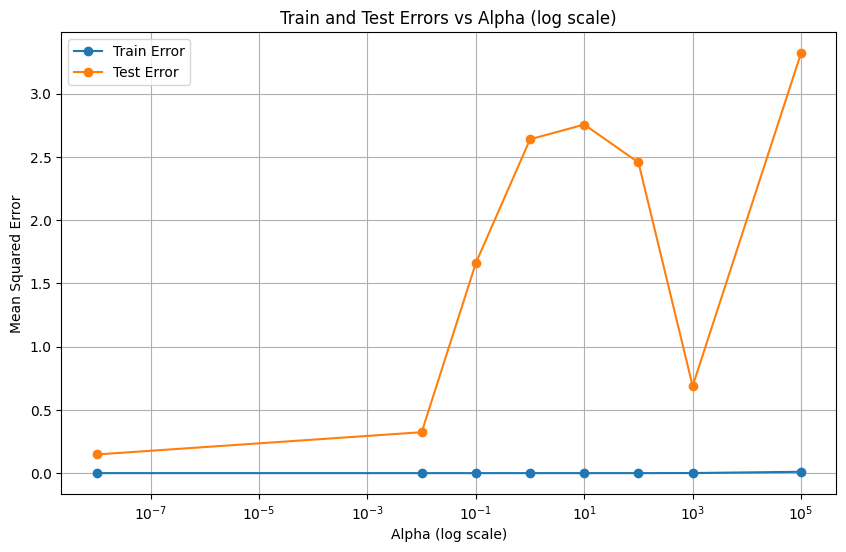

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 5 points for the dataset
np.random.seed(42)
indices = np.random.choice(len(X_full), 5, replace=False)
X_train = X_full[indices]
y_train = y_full[indices]

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

# Reshape X arrays for sklearn
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
X_full = X_full[:, np.newaxis]

# Polynomial degree
degree = 8

# Polynomial feature transformation
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_full_poly = poly.transform(X_full)

# Experiment with different values of alpha
alphas = [1e-8, 0.01, 0.1, 1, 10, 100, 1000, 1e5]  # Different regularization strengths

train_errors = []
test_errors = []

plt.figure(figsize=(12, 8))

# Loop over different values of alpha
for alpha in alphas:
    # Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train_poly, y_train)

    # Predictions
    y_full_pred = model.predict(X_full_poly)

    # Calculate train and test errors
    train_mse = mean_squared_error(y_train, model.predict(X_train_poly))
    test_mse = mean_squared_error(y_test, model.predict(X_test_poly))

    # Append errors for plotting
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # Plot the fitted polynomial for the current alpha
    plt.plot(X_full, y_full_pred, label=f'α={alpha}', linestyle='--')

# Plot true sine function and training points
plt.plot(X_full, np.sin(X_full), label='True Sine Function', color='green')
plt.scatter(X_train, y_train, color='red', label='Training Points', zorder=5)

# Labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Polynomial Fits with Varying α')
plt.legend()
plt.grid(True)
plt.show()

# Plot train and test errors as a function of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Train Error', marker='o')
plt.plot(alphas, test_errors, label='Test Error', marker='o')
plt.xscale('log')  # Use log scale for alpha
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs Alpha (log scale)')
plt.legend()
plt.grid(True)
plt.show()

Answer 12:

To force the polynomial function to behave like a linear function using Ridge regression, we need to choose a sufficiently large value of the regularization parameter $\alpha$. Here's how it works:

**How Ridge Regression Works:**

*  In Ridge regression, a regularization term is added to the cost function, penalizing the sum of the squared values of the coefficients. This regularization shrinks the coefficients of the polynomial terms.

The cost function for Ridge regression is:

The cost function for **Ridge regression** can be written as:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + C \sum_{j=1}^{n} \theta_j^2
$$

where:
- $ \theta $ are the model coefficients.
- $ h_\theta(x^{(i)}) $ is the predicted value for sample $( i )$.
- $ y^{(i)} $ is the true label for sample $( i )$.
- $ \alpha $ is the regularization strength.


The first term is the **mean squared error**. The second term is the **regularization** term controlled by $\alpha$. When alpha is large, the penalty for non-zero coefficients increases, effectively shrinking higher-order coefficients toward zero.


**Impact of Increasing alpha on the Polynomial Model:**

*  Polynomial features introduce higher-order terms (e.g.,$ X^2, X^3, \dots, X^d $) when the degree is greater than 1.

*  Ridge regression penalizes these higher-order terms. As alpha increases, the magnitudes of the coefficients for the higher-degree terms are reduced, meaning the model gives less weight to the higher-degree terms.

*  When $\alpha$ is large enough, the coefficients of the higher-degree terms (e.g., $ X^2, X^3$, etc.) become so small that they effectively contribute nothing to the prediction. What remains is the linear term ($ X^1$), resulting in a model that behaves like a linear function.

**How Large Should alpha Be to Force a Linear Fit?**

To force the polynomial function to become linear, $\alpha$ needs to be large enough to shrink the coefficients of all higher-degree polynomial terms close to zero. The exact value depends on the scale of the data and the degree of the polynomial, but generally:

*  **Moderate $\alpha$ values** (e.g., 1, 10) will reduce the influence of higher-degree terms, but the function will still exhibit some non-linear behavior.
*  **Larger $\alpha$ values** (e.g., 1000, 1e5 or more) will effectively shrink all higher-order polynomial terms to zero, leaving only the linear term. At this point, the model behaves like a simple linear regression.

**Example:**

If we are working with a polynomial of **degree 8**, as we increase alpha, we can observe the behavior of the coefficients of the polynomial terms. For small values of alpha, the model can fit the higher-degree terms, resulting in a non-linear fit. For large alpha, the coefficients of $ X^2, X^3, \dots, X^8 $
  are pushed toward zero, and the model simplifies to a linear function.

In [30]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Generate data
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)
X_full = X_full[:, np.newaxis]

# Polynomial feature transformation (degree 8)
poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(X_full)

# Try different alpha values
alphas = [1e-8, 0.01, 0.1, 1, 10, 100, 1000, 1e5]

print("Alpha values and corresponding polynomial coefficients:")
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_poly, y_full)

    # Print the coefficients
    print(f"Alpha = {alpha}")
    print(f"Coefficients: {model.coef_}")
    print("-" * 50)

Alpha values and corresponding polynomial coefficients:
Alpha = 1e-08
Coefficients: [ 0.00000000e+00  1.00824008e+00 -3.03069369e-02 -1.21543347e-01
 -3.40061602e-02  2.24699189e-02 -3.23163670e-03  1.46950428e-04
  9.52952634e-11]
--------------------------------------------------
Alpha = 0.01
Coefficients: [ 0.00000000e+00  9.31034774e-01  9.12789456e-02 -2.03822278e-01
 -6.51941998e-03  1.80586403e-02 -3.01522903e-03  1.68276865e-04
 -2.10819796e-06]
--------------------------------------------------
Alpha = 0.1
Coefficients: [ 0.00000000e+00  7.36402664e-01  2.23428109e-01 -1.30317068e-01
 -1.23147200e-01  7.06195710e-02 -1.43591682e-02  1.37162359e-03
 -5.25201865e-05]
--------------------------------------------------
Alpha = 1
Coefficients: [ 0.00000000e+00  4.44779526e-01  2.69974801e-01 -1.46212712e-02
 -1.66523840e-01  6.41997822e-02 -8.86500160e-03  4.35213353e-04
 -7.97329573e-07]
--------------------------------------------------
Alpha = 10
Coefficients: [ 0.          0.15

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.82095e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
